# Paper figures
This notebook plots the figures for the manuscript. It starts with a single source of input data (`integrate_data.csv`). We restrict the analysis to our sample of interest (cells infected by a WT virus). Then, we plot the outcomes of infection.

Import Python modules:

In [14]:
from IPython.display import display
from dms_variants.constants import CBPALETTE
import os
import pandas as pd
import plotnine as p9

Set the theme for plots:

In [2]:
p9.theme_set(p9.theme_classic())

Set output folder for figures:

In [16]:
figure_dir = 'results/figures'
if not os.path.exists(figure_dir):
    # Create a new directory because it does not exist 
    os.makedirs(figure_dir)
    print(f"Made `{figure_dir}` directory ")
else:
    print(f"Directory `{figure_dir}` already exists.")

Directory `results/figures` already exists.


# Read integrated data
The general structure of the dataframe is that each cell barcode is listed on a row, and features of that cell are listed in columns. Cells that have more than one valid viral barcode identified may have multiple rows--one for each valid viral barcode.

In [3]:
integrated_data_csv = 'results/viral_fastq10x/scProgenyProduction_trial3_integrate_data.csv'
integrated_data = pd.read_csv(integrated_data_csv)
integrated_data

,cell_barcode,infected,infecting_viral_tag,total_UMIs,viral_UMIs,frac_viral_UMIs,n_viral_genes,transcriptome_UMIs_fluHA,transcriptome_UMIs_fluM,transcriptome_UMIs_fluNA,...,barcoded_gene,viral_barcode,viral_bc_UMIs,frac_viral_bc_UMIs,freq_second_infection,freq_supernatant,max_freq_second_infection,max_freq_supernatant,contributes_progeny_second_infection,contributes_progeny_supernatant
0,AAACCCAGTAACAAGT,uninfected,none,47873,6,0.000125,0,2,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAACCCATCATTGCTT,uninfected,none,90114,10,0.000111,1,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAACGAAAGATGTTGA,uninfected,none,111630,18,0.000161,0,3,10,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAACGAAGTACTTCCC,infected,both,56828,24082,0.423770,7,2,13060,420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAACGAAGTAGACGTG,infected,wt,124341,4654,0.037429,8,319,1582,31,...,fluHA,AAGTAAGCGACATGAG,251.0,0.002019,0.000010,0.000076,0.000010,0.000076,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,TTTGATCTCCCGTTCA,uninfected,none,63150,3,0.000048,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3678,TTTGGAGAGTTGCCTA,uninfected,none,65941,12,0.000182,1,0,6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3679,TTTGGAGGTATCGTTG,infected,wt,150130,3526,0.023486,8,93,1668,45,...,fluHA,AGTAAACTTCCTCGCG,65.0,0.000433,0.000010,0.000695,0.000028,0.001790,True,True
3680,TTTGGAGGTATCGTTG,infected,wt,150130,3526,0.023486,8,93,1668,45,...,fluNA,ACATCTTATTTACACG,39.0,0.000260,0.000028,0.001790,0.000028,0.001790,True,True


# Restrict analysis to WT infected cells
I only want to plot our sample of interest, which is made up of cells infected by a WT virus. Make a dataframe containing only these cells.

In [4]:
wt_infected_cells = (
    integrated_data
    .query('infected == "infected" and infecting_viral_tag == "wt"'))
wt_infected_cells

,cell_barcode,infected,infecting_viral_tag,total_UMIs,viral_UMIs,frac_viral_UMIs,n_viral_genes,transcriptome_UMIs_fluHA,transcriptome_UMIs_fluM,transcriptome_UMIs_fluNA,...,barcoded_gene,viral_barcode,viral_bc_UMIs,frac_viral_bc_UMIs,freq_second_infection,freq_supernatant,max_freq_second_infection,max_freq_supernatant,contributes_progeny_second_infection,contributes_progeny_supernatant
4,AAACGAAGTAGACGTG,infected,wt,124341,4654,0.037429,8,319,1582,31,...,fluHA,AAGTAAGCGACATGAG,251.0,0.002019,0.000010,0.000076,0.000010,0.000076,False,True
5,AAACGAAGTAGACGTG,infected,wt,124341,4654,0.037429,8,319,1582,31,...,fluNA,GTAGGCGATAAGTGGA,26.0,0.000209,0.000010,0.000076,0.000010,0.000076,False,True
19,AAAGGGCTCCGCACTT,infected,wt,128527,3021,0.023505,7,86,735,23,...,fluHA,AATCTACGAGGGAAAC,33.0,0.000257,0.000124,0.001509,0.000124,0.001950,True,True
20,AAAGGGCTCCGCACTT,infected,wt,128527,3021,0.023505,7,86,735,23,...,fluHA,ATGGATCAGATTTCCT,10.0,0.000078,0.000030,0.001950,0.000124,0.001950,True,True
21,AAAGGGCTCCGCACTT,infected,wt,128527,3021,0.023505,7,86,735,23,...,fluHA,GCAAAAATACAAAGTA,28.0,0.000218,0.000010,0.000072,0.000124,0.001950,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,TTTACCAGTCGCTTAA,infected,wt,114567,1434,0.012517,7,125,609,15,...,fluNA,TTGGAGGAGACCCGTG,7.0,0.000061,0.000019,0.001212,0.000019,0.001212,True,True
3652,TTTCACAAGCCAAGCA,infected,wt,68424,2308,0.033731,6,475,796,219,...,fluHA,GAACGCACTCATTATC,306.0,0.004472,0.000010,0.000010,0.000010,0.000010,False,False
3653,TTTCACAAGCCAAGCA,infected,wt,68424,2308,0.033731,6,475,796,219,...,fluNA,GGTATCAGTTATTGTT,186.0,0.002718,0.000010,0.000010,0.000010,0.000010,False,False
3679,TTTGGAGGTATCGTTG,infected,wt,150130,3526,0.023486,8,93,1668,45,...,fluHA,AGTAAACTTCCTCGCG,65.0,0.000433,0.000010,0.000695,0.000028,0.001790,True,True


Quick summary of statistics about our dataset. I will use these numbers in later to check that figures contain the correct number of cells.

In [5]:
n_wt_infected_cells = wt_infected_cells["cell_barcode"].nunique()
print(f'There are {n_wt_infected_cells} cells in the dataset.')

There are 254 cells in the dataset.


# Plots
## Viral transcription

In [6]:
print(f'The maximum fraction of viral transcription '
      f'in an infected cells is {wt_infected_cells["frac_viral_UMIs"].max()}')

The maximum fraction of viral transcription in an infected cells is 0.6711695819913736


/fh/fast/bloom_j/software/miniconda3/envs/barcoded_flu_pdmH1N1/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 3 x 1 in image.
/fh/fast/bloom_j/software/miniconda3/envs/barcoded_flu_pdmH1N1/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: results/figures/viral_trasncription.png


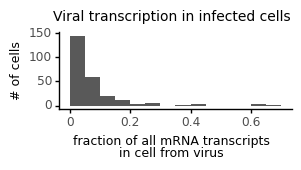

<ggplot: (8754286934366)>

In [19]:
viral_transcription_plot = (
    p9.ggplot(
        wt_infected_cells[['cell_barcode','frac_viral_UMIs']].drop_duplicates(),
        p9.aes(x='frac_viral_UMIs')) +
    p9.geom_histogram(breaks=[0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,
                              0.4,0.45,0.5,0.55,0.6,0.65,0.7]) +
    p9.ggtitle(f'Viral transcription in infected cells') +
    p9.labs(x='fraction of all mRNA transcripts\nin cell from virus',
            y='# of cells') +
    p9.theme(figure_size=(3, 1),
             plot_title=p9.element_text(size=10),
             axis_title=p9.element_text(size=9),
             legend_title=p9.element_text(size=9),
             legend_title_align='center'))
viral_transcription_plot.save(filename = figure_dir+'/'+'viral_trasncription.png')
display(viral_transcription_plot)

## Viral genes per infected cell

/fh/fast/bloom_j/software/miniconda3/envs/barcoded_flu_pdmH1N1/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 2 x 1 in image.
/fh/fast/bloom_j/software/miniconda3/envs/barcoded_flu_pdmH1N1/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: results/figures/genes_per_cell.png


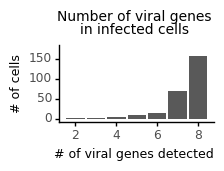

<ggplot: (8754286673502)>

In [60]:
genes_per_cell_plot = (
    p9.ggplot(
        wt_infected_cells[['cell_barcode', 'n_viral_genes']].drop_duplicates(),
        p9.aes(x='n_viral_genes')) +
    p9.geom_bar(stat='count', position='dodge') +
    p9.ggtitle('Number of viral genes\n'
               'in infected cells') +
    p9.labs(x='# of viral genes detected',
            y='# of cells') +
    p9.scale_y_continuous(limits=[0,175], breaks=[0,50,100,150]) +
    p9.theme(figure_size=(2, 1),
                plot_title=p9.element_text(size=10),
                axis_title=p9.element_text(size=9),
                legend_title=p9.element_text(size=9),
                legend_title_align='center'))
genes_per_cell_plot.save(filename = figure_dir+'/'+'genes_per_cell.png')
display(genes_per_cell_plot)

# Viral gene presence or absence

Reorganize data to so

In [78]:
gene_present_by_cell = (
    wt_infected_cells
    [['cell_barcode',
      'present_fluPB2', 'present_fluPB1',
      'present_fluPA', 'present_fluHA',
      'present_fluNP', 'present_fluNA',
      'present_fluM', 'present_fluNS']]
    .drop_duplicates()
    .melt(
        id_vars=['cell_barcode'],
        var_name='gene',
        value_name='gene_present')
)
gene_present_by_cell['gene'] = (
    gene_present_by_cell['gene']
    .str.split('_').str[-1])

gene_frac_by_cell = (
    wt_infected_cells
    [['cell_barcode', 'frac_viral_UMIs',
      'frac_UMIs_fluPB2', 'frac_UMIs_fluPB1',
      'frac_UMIs_fluPA', 'frac_UMIs_fluHA',
      'frac_UMIs_fluNP', 'frac_UMIs_fluNA',
      'frac_UMIs_fluM', 'frac_UMIs_fluNS']]
    .drop_duplicates()
    .melt(
        id_vars=['cell_barcode', 'frac_viral_UMIs'],
        var_name='gene',
        value_name='frac_gene_UMIs')
)
gene_frac_by_cell['gene'] = (
    gene_frac_by_cell['gene']
    .str.split('_').str[-1])

viral_genes_by_cell = pd.merge(
    left=gene_present_by_cell,
    right=gene_frac_by_cell,
    on=['cell_barcode','gene'],
    how='outer'
)
viral_genes_by_cell['gene'] = (
    viral_genes_by_cell['gene']
    .replace(['fluPB2', 'fluPB1', 'fluPA', 'fluHA',
              'fluNP', 'fluNA', 'fluM', 'fluNS'],
             ['PB2', 'PB1', 'PA', 'HA',
              'NP', 'NA', 'M', 'NS']))

assert((viral_genes_by_cell['cell_barcode'].unique() == \
        wt_infected_cells['cell_barcode'].unique()).all())

display(viral_genes_by_cell)

gene_absence_rate = pd.DataFrame(
    viral_genes_by_cell
    .groupby(['gene'])
    ['gene_present']
    .value_counts(normalize=True)
    .reset_index(name='fraction_cells'))
gene_absence_rate['gene_present'] = (
    gene_absence_rate['gene_present']
    .replace([True,False],
             ["Gene present", "Gene absent"]))


assert(gene_absence_rate['gene'].nunique() == 8)

display(gene_absence_rate)

,cell_barcode,gene,gene_present,frac_viral_UMIs,frac_gene_UMIs
0,AAACGAAGTAGACGTG,PB2,True,0.037429,0.000024
1,AAAGGGCTCCGCACTT,PB2,True,0.023505,0.009943
2,AAAGTCCAGTAGAGTT,PB2,True,0.199591,0.003653
3,AACCAACAGGGTCTTT,PB2,True,0.131641,0.001074
4,AACTTCTGTGAGACGT,PB2,True,0.021557,0.000146
...,...,...,...,...,...
2027,TTGCGTCCACCCTCTA,NS,True,0.011315,0.002885
2028,TTGGGATGTAACGATA,NS,True,0.058569,0.022673
2029,TTTACCAGTCGCTTAA,NS,True,0.012517,0.004836
2030,TTTCACAAGCCAAGCA,NS,False,0.033731,0.000015


,gene,gene_present,fraction_cells
0,HA,Gene present,0.854331
1,HA,Gene absent,0.145669
2,M,Gene present,0.933071
3,M,Gene absent,0.066929
4,NA,Gene present,0.956693
5,NA,Gene absent,0.043307
6,NP,Gene present,0.960630
7,NP,Gene absent,0.039370
8,NS,Gene present,0.881890
9,NS,Gene absent,0.118110


/fh/fast/bloom_j/software/miniconda3/envs/barcoded_flu_pdmH1N1/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 3 x 1.5 in image.
/fh/fast/bloom_j/software/miniconda3/envs/barcoded_flu_pdmH1N1/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: results/figures/gene_absence_plot.png


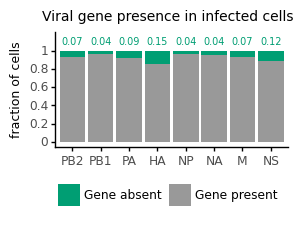

<ggplot: (8754286432546)>

In [87]:
gene_absence_plot = (
    p9.ggplot(gene_absence_rate,
              p9.aes(x='gene',
                     y='fraction_cells',
                     fill='gene_present')) +
    p9.geom_bar(stat='identity') +
    p9.geom_text(data=gene_absence_rate.query('gene_present == "Gene absent"'),
           mapping=p9.aes(x='gene',
                          y=1.1,
                          label='fraction_cells'),
                          format_string='{:.2f}',
                          size=7,
                          color=CBPALETTE[3]) +
    p9.ggtitle('Viral gene presence in infected cells') +
    p9.labs(x = '', y='fraction of cells') +
    p9.scale_x_discrete(limits=['PB2', 'PB1', 'PA', 'HA',
                                'NP', 'NA', 'M', 'NS']) +
    p9.scale_y_continuous(limits=[0,1.15],
                          breaks=[0,0.2,0.4,0.6,0.8,1])+
    p9.theme(figure_size=(3, 1.5),
       plot_title=p9.element_text(size=10),
       axis_title=p9.element_text(size=9),
       legend_position='bottom',
       legend_box_spacing=0.2,
       legend_title=p9.element_blank()) +
    p9.scale_fill_manual([CBPALETTE[3],CBPALETTE[0]]))
gene_absence_plot.save(filename = figure_dir+'/'+'gene_absence_plot.png')
display(gene_absence_plot)